In [1]:
# Loaded variable 'df' from URI: c:\Users\urina\OneDrive\Desktop\기초 프로젝트\h&m dataset\articles_hm.csv
import pandas as pd
import matplotlib as plt
import seaborn as sns
import numpy as np
df_articles = pd.read_csv(r'c:\Users\urina\OneDrive\Desktop\기초 프로젝트\h&m dataset\articles_hm.csv')
df_cust = pd.read_csv(r'c:\Users\urina\OneDrive\Desktop\기초 프로젝트\h&m dataset\customer_hm.csv')
df_trans = pd.read_csv(r'C:\Users\urina\OneDrive\Desktop\기초 프로젝트\h&m dataset\transactions_hm.csv') 

- 문제 정의1 (84%의 고객이 보통 한번에 1개만 구매함)

고객이 딱 하나만 사고 나간다 -> 한번에 여러가지를 하게 만드는 즉, 객단가를 올리는 방법은?

1. 영수증(같은 날짜, 같은 고객) 별 구매 상품 세보기
2. 평균 몇개를 샀을까?
3. 비율 확인: '딱 1개만 산 사람'의 비율 찾기
4. 시각화 해보기

평균 장바구니에 담긴 상품 수: 1.19개
상품을 딱 1개만 구매한 비율: 84.7%


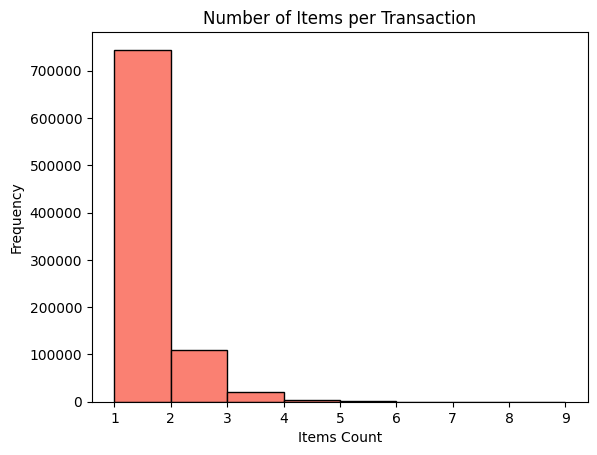

In [ ]:
# 1. 영수증(같은 날짜, 같은 고객) 별 구매 상품 개수 세기
basket_size = df_trans.groupby(['t_dat', 'customer_id'])['article_id'].count()

# 2. 평균 몇 개를 샀을까?
avg_items = basket_size.mean()
print(f"평균 장바구니에 담긴 상품 수: {avg_items:.2f}개")

# 3. 비율 확인: "딱 1개만 산 사람"의 비율은?
one_item_ratio = (basket_size == 1).mean() * 100
print(f"상품을 딱 1개만 구매한 비율: {one_item_ratio:.1f}%")

# 4. 시각화
import matplotlib.pyplot as plt
plt.hist(basket_size, bins=range(1, 10), color='salmon', edgecolor='black')
plt.title("Number of Items per Transaction")
plt.xlabel("Items Count")
plt.ylabel("Frequency")
plt.show()

- 문제 정의2 

상위 1% 옷만 팔리고 나머지는 재료로 썩고있다 (파레토 분석?) -> 
특정 쏠림 현상을 해결하기위해, 안 팔리는 상품을 번들로 팔아보자

1. 상품 별 총 판매량 
2. 전체 판매량 중 누적 비율 
3. 상위 (1,5,10,20)% 상품이 총 매출의 몇 %?
4. 시각화 (파레토 차트)

In [ ]:
# 1. 상품별 총 판매량 계산
article_sales = df_trans['article_id'].value_counts()

# 2. 전체 판매량 중 누적 비율 계산 (Cumulative Sum)
total_sales = article_sales.sum()
cumulative_sales = article_sales.cumsum() / total_sales

# 3. 상위 {X}% 상품이 매출의 몇 %를 차지하는지 확인
top_1_percent_index = int(len(article_sales) * 0.1)
sales_share = cumulative_sales.iloc[top_1_percent_index] * 100

print(f"상위 10% 인기 상품이 전체 판매량의 {sales_share:.1f}%를 차지함.")

# 4. 시각화 (파레토 차트 느낌?)
plt.plot(cumulative_sales.values)
plt.title("Cumulative Sales by Products")
plt.xlabel("Number of Products (Sorted by Popularity)")
plt.ylabel("Cumulative Sales Ratio")
plt.axvline(x=top_1_percent_index, color='r', linestyle='--') 
plt.show()

문제 정의3 

한번 오고 안오는 고객(고객 유지율)이 낮은 이유 ->
고객을 붙잡기 위해서 첫 구매 경험을 극대화해보자

1. 고객 별 총 방문(결제) 횟수 세기 (같은 날에 여러개 산건 1번으로 집계)

2. 딱 한번만 방문한 고객 비율 계산하기


In [ ]:
# 1. 고객별 총 방문(결제) 횟수 세기
# (같은 날 여러 개 산 건 1번 방문으로 침)
visit_counts = df_trans.groupby('customer_id')['t_dat'].nunique()

# 2. 딱 한 번만 방문한 고객 비율 계산
one_time_visitor = (visit_counts == 1).mean() * 100

print(f"재구매 없이 딱 한 번만 이용하고 이탈한 고객 비율: {one_time_visitor_ratio:.1f}%")

재구매 없이 딱 한 번만 이용하고 이탈한 고객 비율: 57.4%


총 3가지의 문제를 찾아냈고 그 중 문제 정의1 -> 고객의 84%가 딱 한가지의 물건만 사고 나간다 을 보완할 프로젝트

- H&M의 가장 큰 문제는 객단가(AOV) 
- 84% 고객이 딱 한벌만 사고 나간다
- 이들에게 어울리는 하의나 엑세서리를 추천해 장바구니에 2개 이상을 담게 만드는것이 이번 프로젝트의 목표